# Задание 1. A/B–тестирование
## 1.1 Условие

Одной из основных задач аналитика в нашей команде является корректное проведение экспериментов. Для этого мы применяем метод A/B–тестирования. В ходе тестирования одной гипотезы целевой группе была предложена новая механика оплаты услуг на сайте, у контрольной группы оставалась базовая механика. В качестве задания Вам необходимо проанализировать итоги эксперимента и сделать вывод, стоит ли запускать новую механику оплаты на всех пользователей.

## 1.2 Входные данные

В качестве входных данных Вы имеете 4 csv-файла:

* `groups.csv` - файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе (А – контроль, B – целевая группа) 
* `groups_add.csv` - дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных
* `active_studs.csv` - файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента. 
* `checks.csv` - файл с информацией об оплатах пользователей в дни проведения эксперимента. 

## 1.3 Вопросы

Предлагаем Вам ответить на следующие вопросы:

* На какие метрики Вы смотрите в ходе анализа и почему?
* Имеются ли различия в показателях и с чем они могут быть связаны?
* Являются ли эти различия статистически значимыми?
* Стоит ли запускать новую механику на всех пользователей?
* Данный список вопросов не является обязательным, и Вы можете при своём ответе опираться на собственный план.

## 1.4 Требования к ответу

При выполнении тестового задания необходимо использовать язык программирования Python. 
В файле обязательно должны быть комментарии к тем действиям, которые Вы выполняете с данными. 
Файл должен представлять собой законченный отчёт с выводами, сделанными в ходе исследования.

In [212]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import requests
import scipy 
from scipy import stats
from scipy.stats import levene
from scipy.stats import norm
from tqdm.auto import tqdm

In [213]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize': (10, 5)})

## Соберем таблицу для анализа и посчитаем метрики

In [214]:
# считаем файлы с сервера
req1 = requests.get('https://s856sas.storage.yandex.net/rdisk/bf63a619bc7bbb74fe97b32a6309d58f06750e8291c5b4b40a8563ede208638b/63166c75/fKqInKw3d7bLFOeFnMGnhLWIS9AmXMMXWGR17A-BkO3-qg5Wp8tUAp7lxoJJvJyG8pjltSuuxShICmGl2FDiJhbsM4PC04KdB-NoZUjfeOOr8npumZHI4midPdWhecNq?uid=0&filename=%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_2_groups.csv&disposition=attachment&hash=FjLs%2B6AJdyaRoyFMFeL4raj9RoBP3hYIuXfguWvuEGcjdjYEIrmN7ZN/eZ32Z77Cq/J6bpmRyOJonT3VoXnDag%3D%3D&limit=0&content_type=text%2Fplain&owner_uid=125175473&fsize=724984&hid=4b9098e1d545e562c779de19f9f64e2f&media_type=spreadsheet&tknv=v2&rtoken=Cd2umVfCJ7PZ&force_default=no&ycrid=na-1ece694e3e6ea729ff90f9f91d76f5ed-downloader13h&ts=5e7f4e86c4740&s=abd4364b0d1896ee4f3e52f7e984787320fe779bd0b1b6049b1c7d354190cb18&pb=U2FsdGVkX18CUuITc0zHpFLFgnhNoLaBcxXkGD0cHhPmclo2GfCMEA4IQtO3qQxp-HljLNqfLs5jYZtD-Lu6yl3hNihJPgPbvi_5XOOiU3PNpGVlq4S2zOI7oRZpwk9W')
data1 = req1.content
groups = pd.read_csv(BytesIO(data1), sep=';')

req2 = requests.get('https://s750sas.storage.yandex.net/rdisk/58e21ecf036fb428c99a58b3eea3dfc9d828030aec5f58d18ecb15aa8629c75a/63166c79/fKqInKw3d7bLFOeFnMGnhGAdJ2MSdW82i4_ghmwgsZlWhJkpRytn07Ls4kX484X-lezQy4loqSz9AFrIeHDnv8QEHwKSTiYbb_hzq1q6XQir8npumZHI4midPdWhecNq?uid=0&filename=%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_2_group_add.csv&disposition=attachment&hash=0ertv33lnyTdzTu9NbdN9MtgpuTSXleSHZ%2BvhK85v05jGwJs7DHSrj4ununKsRcfq/J6bpmRyOJonT3VoXnDag%3D%3D&limit=0&content_type=text%2Fplain&owner_uid=125175473&fsize=949&hid=e8dcec35987c367a56f82404a22463b7&media_type=spreadsheet&tknv=v2&rtoken=Hnet4EXoEDIB&force_default=no&ycrid=na-d8ac261293290371282d40e6940e844e-downloader13h&ts=5e7f4e8a95040&s=12cba5d16f4329502e629bd330d04e72fbd5fb0b05ac0c4c6b48ab41823f04ce&pb=U2FsdGVkX1-pe_sK-WLOxr_dnlvToqA3t0qn2oXGXaRVl0yUHiwpfGddd1HHp1aIOtxo-j6XCU7qBxq9xNsLmSbkTR9WwC53PtrneA94Yg43VIMleGiyejCfyArvPZzp')
data2 = req2.content
groups_add = pd.read_csv(BytesIO(data2), sep=',')

req3 = requests.get('https://s432vla.storage.yandex.net/rdisk/b4d324cc8665fbe98ab90b116ac3731b231173a5aefd01765cb9f70bd6e9aaf3/63166c7c/n3N0SQYM2SoDHEJIQgKt2ujEDw5jYN17sSz14UE4iwGyYlrHRmnPoV9WI8mqa1dmF6Qt_88ffG90wBmmEpDhFQ==?uid=0&filename=%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_2_active_studs.csv&disposition=attachment&hash=zWS0uLxK3MRXd/4/IErmDFQBGvbpGD1qm/aJx/k6EUUtE6DaDI0uGkDT4cHh/WJbq/J6bpmRyOJonT3VoXnDag%3D%3D&limit=0&content_type=text%2Fplain&owner_uid=125175473&fsize=65131&hid=3ed23002f82477fd8c7d4a21c17d8034&media_type=spreadsheet&tknv=v2&rtoken=xxGewO8sNlOX&force_default=no&ycrid=na-a38f29ce0154caff5fd37fa2eca82b09-downloader13h&ts=5e7f4e8d71700&s=0c226b911833778c43a17d098eea7d13b89a16eeb59964039239cb48d75a2777&pb=U2FsdGVkX18xmgn6SF-y0xkm9JPvg6DmR3wQ2GaU-9eG2ZHVpLmymXm-xM47jXKzpTwW5aXgnAalidnsiVKPCJj_0gQV28TERYbMFsKwvhY')
data3 = req3.content
active_studs = pd.read_csv(BytesIO(data3), sep=';')

req4 = requests.get('https://s251vla.storage.yandex.net/rdisk/992bbef236713dbaeea0587caad4684548e3cc51345236dee649e0ad1968fcd8/63166c80/n3N0SQYM2SoDHEJIQgKt2psRrG10OKyAasqgpda4iX7NDTSjoP6nmHZtzOqJXgQH436kYOx6cWVM8zgvGq_zHg==?uid=0&filename=%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_2_checks.csv&disposition=attachment&hash=TeGedpkC9yRvIkaaNDf1zC3bFkr2Kvo9MvW7kYjfHc5svktv83UZ47kn6%2BaauC1pq/J6bpmRyOJonT3VoXnDag%3D%3D&limit=0&content_type=text%2Fplain&owner_uid=125175473&fsize=7764&hid=caf94adff3374e1c1a09fba3aae11e50&media_type=spreadsheet&tknv=v2&rtoken=M5pMEsicihsD&force_default=no&ycrid=na-41f169f9dbb295d16fbd44683c52d612-downloader13h&ts=5e7f4e9142000&s=7925caa1f495dd040cd42ca91a40c069c5a4c0d154bb07a0ed1ee644f6a5f7f7&pb=U2FsdGVkX1-VznT8F2Unh54EN8CnRGt88JKBloRQFR6468Q2sTHUJfXtSwmAjvxXqIWBXOTw2Zsxf0AYkr0PLZsJKm-9Em2UpQGiDk58tRM')
data4 = req4.content
checks = pd.read_csv(BytesIO(data4), sep=';')

In [215]:
# считаем файлы из каталога
# groups = pd.read_csv('Files/Проект_2_groups.csv', sep=';')
# groups_add = pd.read_csv('Files/Проект_2_group_add.csv', sep=',')
# active_studs = pd.read_csv('Files/Проект_2_active_studs.csv', sep=';')
# checks = pd.read_csv('Files/Проект_2_checks.csv', sep=';')

In [216]:
# объединим таблицы groups и groups_add для получения полной картины о пользователях, попавших в a/b тестирование
groups = pd.concat([groups, groups_add])

In [217]:
# переименуем колонку student_id в id для объединения таблиц
active_studs = active_studs.rename(columns={'student_id': 'id'})
checks = checks.rename(columns={'student_id': 'id'})

In [218]:
# проверим, не появились ли дубли пользователей
groups.loc[groups.duplicated(subset=['id'])] 

,id,grp


In [219]:
# проверим, есть ли в таблице чеков строки с одинаковым id пользователей
checks.loc[checks.duplicated(subset=['id'])] 

,id,rev


In [220]:
# узнаем к каким группам принадлежали пользователи, зашедшие в дни эксперимента
final_table = active_studs.merge(groups, how='left', on='id')
final_table

,id,grp
0,581585,A
1,5723133,A
2,3276743,B
3,4238589,A
4,4475369,B
...,...,...
8336,1794344,B
8337,296883,B
8338,3598448,B
8339,3610547,B


In [221]:
# объединим полученные данные с третьей таблицей и пустые значения по выручке заменим на 0 
# для удобства дальнейших рассчетов
final_table = final_table.merge(checks, how='left', on='id').fillna(0)
final_table

,id,grp,rev
0,581585,A,0.0
1,5723133,A,0.0
2,3276743,B,0.0
3,4238589,A,0.0
4,4475369,B,0.0
...,...,...,...
8336,1794344,B,0.0
8337,296883,B,0.0
8338,3598448,B,0.0
8339,3610547,B,290.0


In [222]:
# узнаем к каким группам принадлежали пользователи, купившие в дни эксперимента
final_checks = checks.merge(groups, how='left', on='id')
final_checks

,id,rev,grp
0,1627,990.0,A
1,3185,690.0,B
2,25973,690.0,B
3,26280,690.0,B
4,100300,990.0,B
...,...,...,...
536,5645737,1900.0,B
537,5651566,1900.0,B
538,5662322,1900.0,B
539,5681918,1900.0,B


In [223]:
# объединим пользователей, купивших в дни эксперимента и основную таблицу, для того, чтобы учесть пользователей, 
# которые совершили покупку, но не заходили на платформу
final_table = pd.concat([final_table, final_checks])
final_table

,id,grp,rev
0,581585,A,0.0
1,5723133,A,0.0
2,3276743,B,0.0
3,4238589,A,0.0
4,4475369,B,0.0
...,...,...,...
536,5645737,B,1900.0
537,5651566,B,1900.0
538,5662322,B,1900.0
539,5681918,B,1900.0


In [224]:
# удалим повторяющиеся id из результирующей таблицы
final_table = final_table.drop_duplicates(subset=['id'])
final_table

,id,grp,rev
0,581585,A,0.0
1,5723133,A,0.0
2,3276743,B,0.0
3,4238589,A,0.0
4,4475369,B,0.0
...,...,...,...
508,5291900,B,199.0
512,5331842,B,290.0
521,5486319,B,199.0
530,5562806,B,398.0


In [225]:
# проверим, что объединение таблиц прошло успешно
final_table.head(5)

,id,grp,rev
0,581585,A,0.0
1,5723133,A,0.0
2,3276743,B,0.0
3,4238589,A,0.0
4,4475369,B,0.0


In [226]:
# проверим кол-во пользователей в каждой из групп, сумму по выручке и arpu
final_table_grouped = final_table
final_table_grouped['rev2'] = final_table_grouped.rev
final_table_grouped['rev3'] = final_table_grouped.rev

final_table_grouped = final_table_grouped\
    .groupby(['grp'], as_index=False)\
    .agg({'id': 'count', 'rev': 'sum', 'rev2': 'mean'})\
    .rename(columns={'id': 'number_of_users', 'rev': 'revenue', 'rev2': 'arpu'})

final_table_grouped

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,grp,number_of_users,revenue,arpu
0,A,1567,92096.0000,58.772176
1,B,6923,481230.0036,69.511773


Из полученных данных можно сделать вид, что кол-во пользователей между группами отличается примерно в 4 раза, а средний чек на 9 единиц

In [227]:
final_table

,id,grp,rev,rev2,rev3
0,581585,A,0.0,0.0,0.0
1,5723133,A,0.0,0.0,0.0
2,3276743,B,0.0,0.0,0.0
3,4238589,A,0.0,0.0,0.0
4,4475369,B,0.0,0.0,0.0
...,...,...,...,...,...
508,5291900,B,199.0,199.0,199.0
512,5331842,B,290.0,290.0,290.0
521,5486319,B,199.0,199.0,199.0
530,5562806,B,398.0,398.0,398.0


In [228]:
# проверим кол-во платящих пользователей в каждой из групп и arppu
final_table_grouped_active = final_table\
    .query('rev != 0')\
    .groupby(['grp'], as_index=False)\
    .agg({'id': 'count', 'rev2': 'mean', 'rev3': 'median'})\
    .rename(columns={'id': 'number_of_paid_users', 'rev': 'revenue', 'rev2': 'arppu', 'rev3': 'rev_median'})

final_table_grouped_active

,grp,number_of_paid_users,arppu,rev_median
0,A,107,860.710280,690.0
1,B,434,1108.824893,935.0


In [229]:
# объединим таблицы для наглядности сравнения метрик
final_table_metrics = final_table_grouped.merge(final_table_grouped_active, how='left', on='grp')
# посчитаем конверсию из пользователей в пользователей, осуществивших покупку
final_table_metrics['CR'] = final_table_metrics.number_of_paid_users / final_table_metrics.number_of_users * 100
final_table_metrics

,grp,number_of_users,revenue,arpu,number_of_paid_users,arppu,rev_median,CR
0,A,1567,92096.0000,58.772176,107,860.710280,690.0,6.828334
1,B,6923,481230.0036,69.511773,434,1108.824893,935.0,6.268959


## Создадим выборки и построим графики

In [230]:
# передадим выборки в переменные 
# a и b включают в себя всех пользователей, их будем использовать для сравнения ARPU 
# a0 и b0 включают в себя только заплативших пользователей, будем использовать их для сравнения ARPPU
a = final_table\
    .query("grp == 'A'")\
    .rev

b = final_table\
    .query("grp == 'B'")\
    .rev

a0 = final_table\
    .query("grp == 'A' & rev != 0")\
    .rev

b0 = final_table\
    .query("grp == 'B' & rev != 0")\
    .rev

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


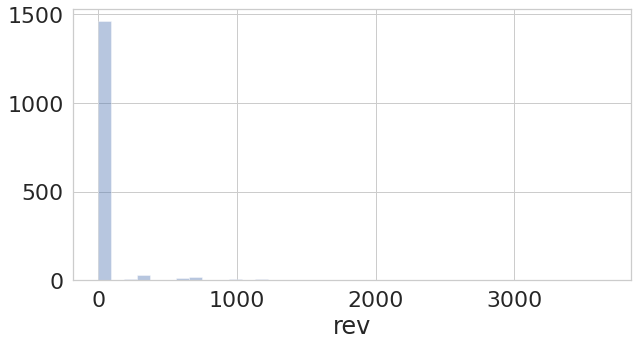

In [231]:
# построим гистограмму группы a
sns.distplot(a, kde=False)

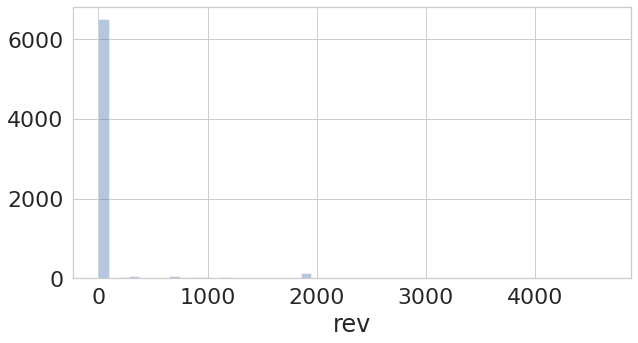

In [232]:
# построим гистограмму группы b
sns.distplot(b, kde=False)

Вывод из графиков гистограмм: данные распределены не нормально, все данные собраны в левой части, присутствуют выбросы.

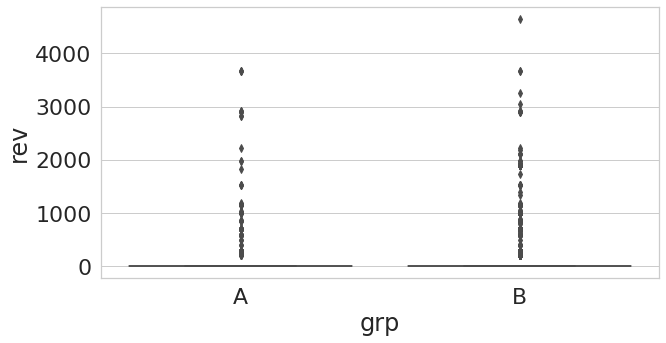

In [233]:
# построим боксплоты распредлений группы a и b
sns.boxplot(x="grp", y="rev", data=final_table)

Вывод: на графике боксплотов видны выбросы, невозможно зрительно отличить первый и третий квартиль и положение медианы.

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


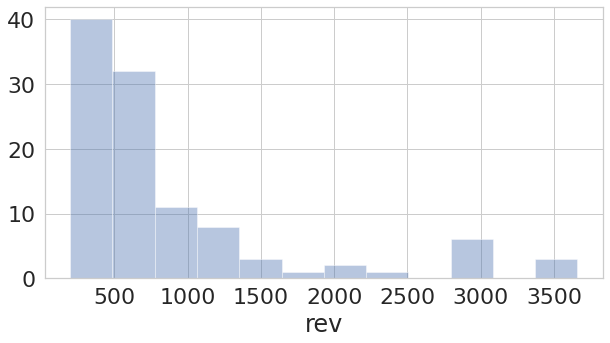

In [234]:
# построим гистограмму группы a0
sns.distplot(a0, kde=False)

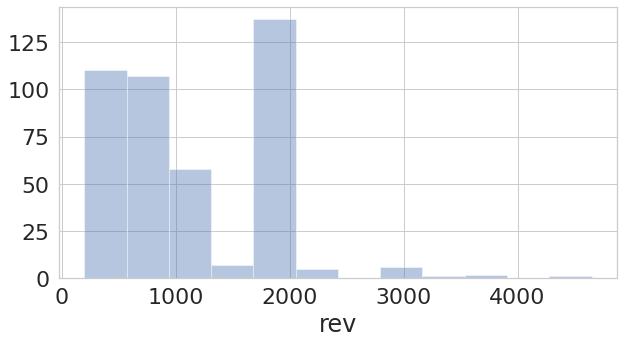

In [235]:
# построим гистограмму группы b0
sns.distplot(b0, kde=False)

Вывод из графика: данные распределены не нормально, но более равномерно чем для группы "а", но тем не меенее есть перекос в левой части.

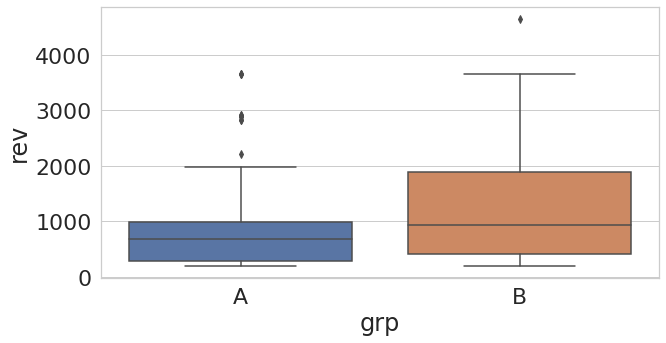

In [236]:
# построим боксплоты распредлений группы a0 и b0
sns.boxplot(x="grp", y="rev", data=final_table.query('rev != 0'))

Вывод: на графике боксплотов практически отсутсвуют выбросы, можно зрительно сравнить медиану. Разброс значений в выборке b0 значительно меньше

## Проверим статистическими методами выборки и различия в метриках

In [237]:
# проверим выборки на нормальность, нулевая гипотеза говорит о том, что распределение нормально
print(stats.shapiro(a))
print(stats.shapiro(a0))
print(stats.shapiro(b))
print(stats.shapiro(b0))

ShapiroResult(statistic=0.1949470043182373, pvalue=0.0)
ShapiroResult(statistic=0.7196124196052551, pvalue=5.321687643507211e-13)
ShapiroResult(statistic=0.22011637687683105, pvalue=0.0)
ShapiroResult(statistic=0.8672363758087158, pvalue=8.947892893418603e-19)


/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Выборки не распределены нормально. Выборки "a" и "b" имеют большие выбросы, следовательно для их сравнения не рекомендуется использовать t-test

In [238]:
# посчитаем дисперсии
sd_a = round(np.std(a), 2)
sd_b = round(np.std(b), 2)
print(sd_a, sd_b)

sd_a0 = round(np.std(a0), 2)
sd_b0 = round(np.std(b0), 2)
print(sd_a0, sd_b0)

303.58 326.59
812.07 740.98


In [239]:
# проверяем равность дисперсий выборок a0 и b0, нулевая гипотеза для теста Левена состоит в том, 
# что дисперсия между группами одинакова
stat, p = levene(a0, b0)
print(p)

0.03477352573759214


P < 0.05, следовательно дисперсии не одинаковы. Следовательно мы не можем использовать t-тест, который на входе имеет требование гомогенности дисперсий

In [240]:
# посчитаем p-value с помощью u-теста, сравнивать группы a и b некорректно, 
# поскольку данный непараметрический тест чувствителен к большому числу одинаковых значений, 
# а именно таких и много в выборках a и b
print(scipy.stats.mannwhitneyu(a0, b0))

MannwhitneyuResult(statistic=17862.0, pvalue=0.00019316054996380152)


U-test показал статистическую значимость для метрики ARPPU

In [241]:
# напишем функции для сравнения с помощью бутстрапа
plt.style.use('ggplot')


# бутстрап с оценкой среднего
def get_bootstrap_mean(
    data_column_1,  # числовые значения первой выборки
    data_column_2,  # числовые значения второй выборки
    boot_it=1000,  # количество бутстрэп-подвыборок
    statistic=np.mean,  # интересующая нас статистика
    bootstrap_conf_level=0.95  # уровень значимости
):
    boot_data = []
    for i in tqdm(range(boot_it)):  # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            len(data_column_1), 
            replace=True  # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            len(data_column_1), 
            replace=True
        ).values
        
        boot_data.append(statistic(samples_1) - statistic(samples_2))  # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level) / 2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x=0, 
        loc=np.mean(boot_data), 
        scale=np.std(boot_data)
    )
    p_2 = norm.cdf(
        x=0, 
        loc=-np.mean(boot_data), 
        scale=np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins=50)
    for bar in bars:
        if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants, ymin=0, ymax=50, linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}


# бутстрап с оценкой медианного
def get_bootstrap_median(
    data_column_1,  # числовые значения первой выборки
    data_column_2,  # числовые значения второй выборки
    boot_it=1000,  # количество бутстрэп-подвыборок
    statistic=np.mean,  # интересующая нас статистика
    bootstrap_conf_level=0.95  # уровень значимости
):
    boot_data = []
    for i in tqdm(range(boot_it)):  # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            len(data_column_1), 
            replace=True  # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            len(data_column_1), 
            replace=True
        ).values
        
        boot_data.append(statistic(samples_1) - statistic(samples_2))  # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level) / 2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x=0, 
        loc=np.mean(boot_data), 
        scale=np.std(boot_data)
    )
    p_2 = norm.cdf(
        x=0, 
        loc=-np.mean(boot_data), 
        scale=np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins=50)
    for bar in bars:
        if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants, ymin=0, ymax=50, linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

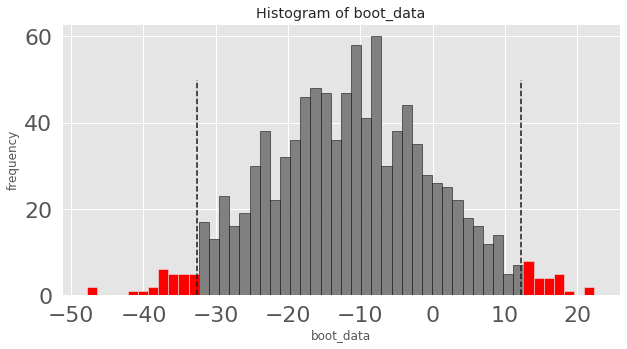

In [242]:
booted_data = get_bootstrap_mean(a, b)

0 в интервал для средних попадает, нулевая гипотеза не отклоняется

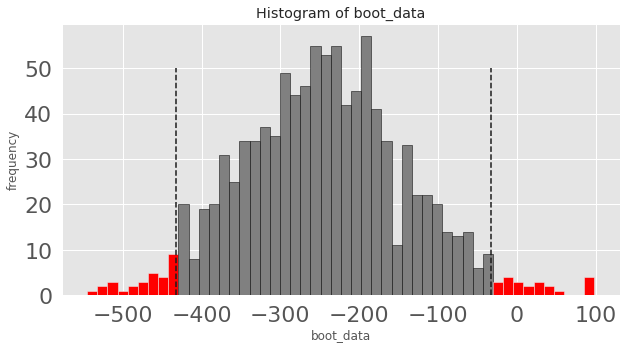

In [243]:
booted_data = get_bootstrap_mean(a0, b0)

0 в интервал для средних не попадает, нулевая гипотеза отклоняется

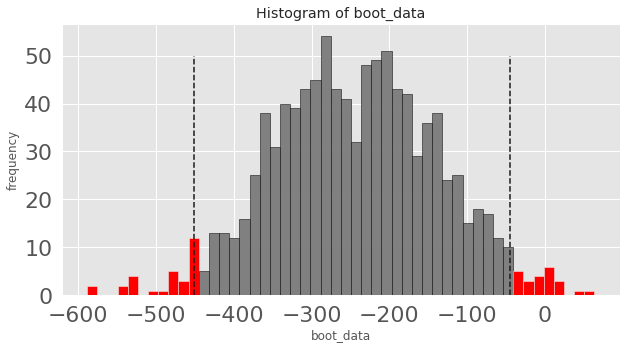

In [244]:
booted_data = get_bootstrap_median(a0, b0)

0 в интервал для медиан не попадает, нулевая гипотеза отклоняется

Применяя бутстрап для оценки среднего и медианы мы сказать, что существуют статистически значимая разница между показателями ARPPU и медианным значением выручки для платящих пользователей

## Проверим, значимы ли различия в конверсии

In [245]:
# создадим колонку конверсия со значением 1 или 0 для каждого пользователя в зависимости от того, 
# была ли у него конверсия
final_table['conver'] = np.where(final_table.rev > 0, 1, 0)
final_table

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,grp,rev,rev2,rev3,conver
0,581585,A,0.0,0.0,0.0,0
1,5723133,A,0.0,0.0,0.0,0
2,3276743,B,0.0,0.0,0.0,0
3,4238589,A,0.0,0.0,0.0,0
4,4475369,B,0.0,0.0,0.0,0
...,...,...,...,...,...,...
508,5291900,B,199.0,199.0,199.0,1
512,5331842,B,290.0,290.0,290.0,1
521,5486319,B,199.0,199.0,199.0,1
530,5562806,B,398.0,398.0,398.0,1


In [246]:
# создадим выборки для групп по столбцу конверсия
a_conv = final_table\
    .query("grp == 'A'")\
    .conver

b_conv = final_table\
    .query("grp == 'B'")\
    .conver

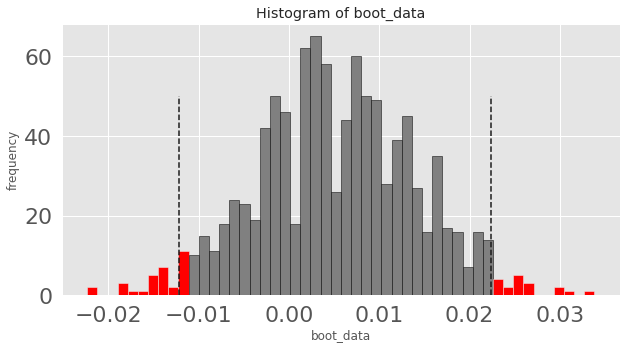

In [247]:
# проверим разницу между средними с помощью бутстрапа
booted_data = get_bootstrap_mean(a_conv, b_conv)

0 в интервал для средних попадает, нулевая гипотеза не отклоняется

In [250]:
# проверим аналогичные различия с помощью точного теста фишера, для этого посчитаем кол-во неплативших пользователей
final_table_metrics['number_of_non_paid_users'] = final_table_metrics.number_of_users - 
                                                  final_table_metrics.number_of_paid_users
final_table_metrics

SyntaxError: invalid syntax (<ipython-input-250-e6e0aa369ff2>, line 2)

In [249]:
# посчитаем p-значение
data = [[final_table_metrics.number_of_paid_users[0], final_table_metrics.number_of_non_paid_users[0]],
        [final_table_metrics.number_of_paid_users[1], final_table_metrics.number_of_non_paid_users[1]]]
  
# performing fishers exact test on the data
odd_ratio, p_value = stats.fisher_exact(data)
p_value

0.42262740586374836

p > 0.05, следовательно нулевая гипотеза не отклоняется, взаимосвязи нет

## Вывод
#### На какие метрики Вы смотрите в ходе анализа и почему?
1) Для анализа a/b теста и понимания полной картины мы смотрим на следующие метрики в разрезе групп:
* кол-во пользователей в каждой из групп (для понимания объема выборок и последующей интепритации тестов)
* выручка (для соотнесения отношения по объему выборок к отношению по выручке между группами)
* кол-во платящих пользователей (для пониманий какой объем пользователей нам приносит основную выручку)
* ARPU - средний доход, который получает кампания на пользователя за период
* ARPPU - средний доход, который получает кампания на платящего пользователя за период
* медианная выручка для платящих пользователей (на основе данной метрики можно сделать вывод о наличии выбросов)
* CR - конверсия из пользователя в платящего пользователя

На основе требуемой для бизнеса модели мы можем стремиться к различными измененим для метрик ARPU, ARPPU, CR. Например, если наша цель получить как можно больше платящих клиентов вне зависимости от чека, то для нас в первую очередь важен рост показателя CR, однако, если же для нас не так важно количество клиентов (возможно нам дорого их обслуживать), сколько важна прибыль на одного платящего клиента с учетом высокого среднего чека, то нам желательно стремится к увеличению показателя ARPPU.

#### Какие показатели статистически значимо отличаются и почему?
2) С помощью тестов зафиксированы статистически значимые различия в большую сторону для группы B в следующих показателях:
* ARPPU
* медианным значением выручки для платящих пользователей

Статистической значимости различий между конверсиями для разных групп не обнаружено.

#### Стоит ли запускать новую механику на всех пользователей?
3) Да, для увеличения выручки стоит запустить новую механику на всех пользователей при учете того, что группы для тестирования были сформированы корректно и тест продолжался необходимое количество времени с учетом специфики бизнеса (сезонность и так далее)